In [2]:
%plot -b inline -h 500 -w 1000

Operation terminated by user during adjustbackground


In modifyColorsForPrint (line 70)
                adjustbackground('save', h);

In printjobContentChanges

In printjobContentChanges

In alternatePrintPath

In alternatePrintPath

In print (line 82)
pj = alternatePrintPath(pj);

In saveas (line 181)
        print( h, name, ['-d' dev{i}] )



the MATLAB function has been cancelled


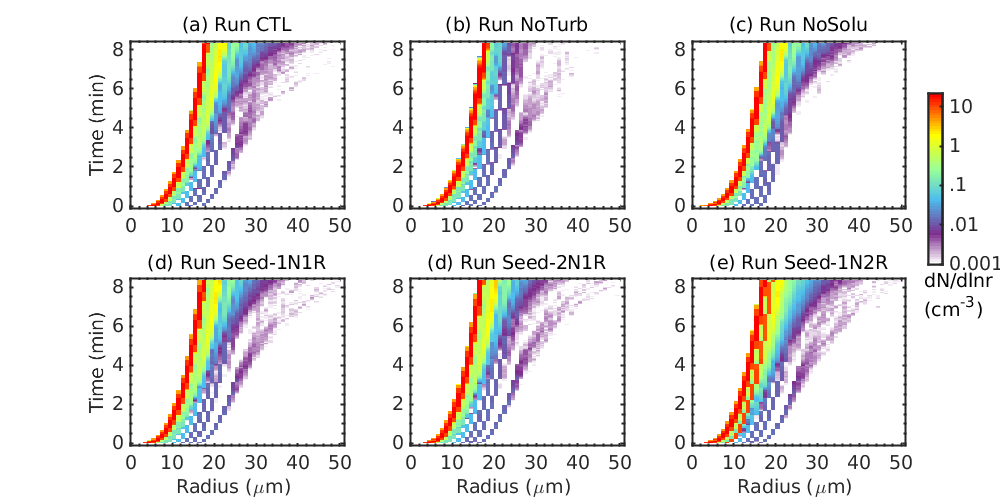

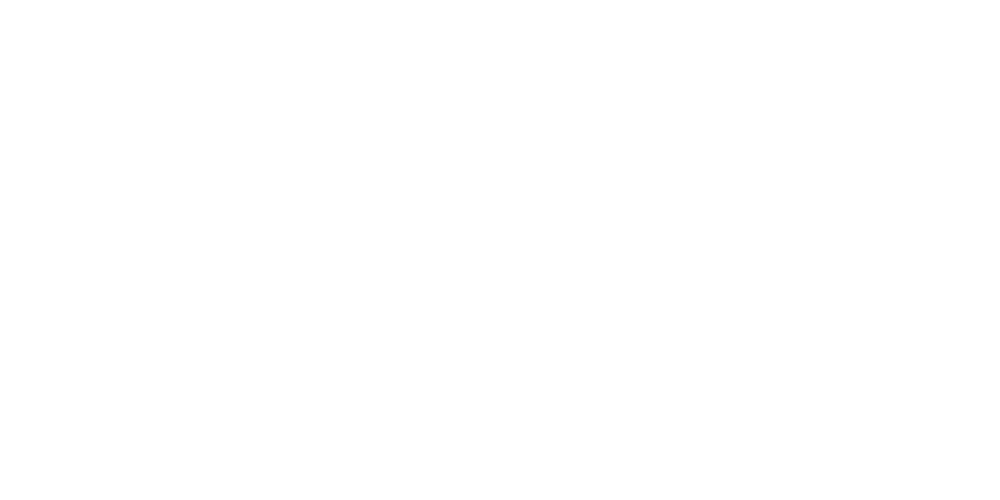

In [4]:
%%DSD EVOLUTION
clear all
%plot -b inline -h 500 -w 1000
%dirpath='./New_version(double_precision) data/cond_coll_smalldt/';
dirpath='/glade/u/home/sisichen/seeding_cases_link/cc_largedt/';
dirpath1='/glade/u/home/sisichen/seeding_cases_link/condensation_only/';
fontsize_set=14;
i_dsd_evo = 1; %plot DSD evolution
i_dsd_stairs = 0; %plot stairs gram of certain time frame.
i_mass = 0; %plot mass distribution
%iplot_stairs = 0;
i_dsd_samecase = 0; %output the same case dsd of different times
i_statistics=0;
ipart2=0;
idisp=0;
i_6min=0; %%%plot DSD at 6min
Time=500; %second
dsd_limit = 50; %maximum bin size plotted out
scenario={'5micron','gravity','no_solute','5micron_seed','double_seeding','GCCN'};
label_tag={'(a) Run CTL','(b) Run NoTurb','(c) Run NoSolu','(d) Run Seed-1N1R','(d) Run Seed-2N1R','(e) Run Seed-1N2R'};
total_case=[1:6];
selected_case=scenario(total_case);
nmap=length(total_case);
%map = brewermap(nmap,'Set1');
map=colormap(hsv(nmap));
l=16.5;
ncase=length(total_case);
figure1=figure;
set(figure1,'Visible','on');
set(0,'DefaultAxesTitleFontWeight','normal');
nframe=3;
if i_dsd_evo == 1
    figfilename=['dsd_evo' ];
elseif i_dsd_stairs == 1
    figfilename=[ 'dsd_stairs' ];
end 
for i_case=1:ncase
    CASE=scenario{total_case(i_case)};
    filename=[dirpath, CASE, '/RUN06262018.dsd'];
    filename_mean=[dirpath, CASE, '/RUN06262018.nc'];
    
    scenario{total_case(i_case)};
    clear DSD DSD2 avg max0 disp max95 DSD_TIME lwc dbz
    if i_dsd_samecase==1
        switch nframe
        case 1
            Time=120;
            leg{1}='2min';
        case 2
            Time=240;
            leg{2}='4min';
        case 3
            Time=360;
            leg{3}='6min';
        case 4 
            Time=420;
            leg{4}='7min';
        end
    end
    if i_case == 1
        iplot_starts=1;
    else
        iplot_starts=0;
    end
    DSD=load(filename);
    DSD(:,51:end)=0;
    meandata=load(filename_mean);
    [sizet,sizev]=size(meandata) ;
    rhoa=meandata(2:2:sizet,end);
    supersat=meandata(:,2);
    supersat_time=meandata(:,1)-meandata(1,1);
    [m,n]=size(DSD); %m=time n=binsxx
    if m>sizet %more DSD data than rhoa data
        rhoa(sizet+1:m)=rhoa(end);
    else
        rhoa=rhoa(1:m);
    end
    rhoa_ratio=rhoa(1)./rhoa;
    %%dispersion parameter
    radii=1:100;
    max0=0;
    max95=0;
    DSD1=DSD(:,2:end);
    for t=1:m
        DSD2=DSD(t,2:end);
        DSD_TIME=DSD(:,1)-DSD(1,1);
        for drop_size=1:100
            DSD_cum(t,drop_size)=sum(DSD2(1:drop_size));
        end
        %mean
        avg(t)=(sum(DSD2.*radii.^3)/sum(DSD2))^(1/3);
        %standard deviation
        SD(t)=sqrt(sum(DSD2.*((radii-avg(t)).^2))/sum(DSD2));
        %dispersion parameter=SD/avg
        disp(t)=SD(t)/avg(t);
        %maximum radius
        max0(t)=max(find(DSD(t,:)>0));
        %largest droplet of 95% percentile 
        max95(t)=max(find(DSD_cum(t,:)./DSD_cum(t,end)<=0.999));
        %LWC
        lwc(t)=sum(4/3*pi*((1:100)*1e-6).^3.*DSD2*1e6)/(l/100)^3;
        %radar reflectivity
        reflect(t)=sum(DSD2.*((1:100)*2*1e-3).^6/(l/100)^3);
        dbz(t)=10*log10(reflect(t));
    end %t
    %% get statistics at 6min and plot DSD
    if i_6min==1
    A=find(DSD_TIME>360 & DSD_TIME<362);
    AVG(i_case)=avg(A(end));
    DISP(i_case)=disp(A(end));
    MAX(i_case)=max0(A(end));
    LWC(i_case)=lwc(A(end));
    DBZ(i_case)=dbz(A(end));
    SDD(i_case)=SD(A(end));
    bar(1:100,DSD(A(end),2:end),1)
    set(gca,'YScale','log')
    xlim([0 dsd_limit+1])
    title(label_tag(total_case(i_case)))
    end
%%
    if i_statistics == 1
        cm=colormap(jet(5));
        set(groot, 'DefaultAxesColorOrder',cm,'defaultAxesLineStyleOrder','-|--|--<|:o|-.diamond|--square|-x')
        subplot(2,2,1)
        h_avg(i_case)=plot(DSD_TIME/60, avg,'LineStyle','-','Color',map(i_case,:));
        ylabel('Mean radius (\mum)')
        xlabel('Time (min)')
        hold on
        xlim([0 Time/60+0.1])
        title('(a)')
        subplot(2,2,2)
        h_disp(i_case)=plot(DSD_TIME/60, disp,'LineStyle','-','Color',map(i_case,:));
        ylabel('dispersion parameter')
        xlabel('Time (min)')
        hold on
        xlim([0 Time/60+0.1])
        title('(b)')
        subplot(2,2,3)
        h_max(i_case)=plot(supersat_time/60, supersat,'LineStyle','-','Color',map(i_case,:));
        ylabel('Supersaturation')
        xlabel('Time (min)')
        hold on
        xlim([0 Time/60+0.1])
        title('(c)')
        subplot(2,2,4)
        h_lwc(i_case)=plot(DSD_TIME/60, lwc,'LineStyle','-','Color',map(i_case,:));
        ylabel('LWC (g/kg)')
        xlabel('Time (min)')
        hold on
        xlim([0 Time/60+0.1])
        title('(d)')
    end
    if i_dsd_stairs ==1
        DSD2=0;
        A=find(DSD==0);
        DSD2=DSD;
        DSD2(A)=1d-5;
        if i_mass==1
            DSD2(A)=NaN;
        end
        DSD2=DSD2/l^3;
        subplot(2,3,i_case,'Visible','on');
        axes1=findobj(gcf,'type','axes');
        %axes1 = axes('Parent',figure1,'YScale','log');
        
        if i_mass==1
            Nlog=[.5:99.5].^3*4/3*pi*1e6*1e-12; %m^-3
        else
            Nlog=1;%[.5:98.5];
        end
        DSD_stairs=DSD2(1,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %T=0min
        %b=stairs(.5:99.5,DSD_stairs,'Color','k','LineStyle','--','LineWidth',1);
        %hold on
        %h= bar(1:100,DSD_stairs,'FaceColor','k',...
        %    'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
        %end
        
        Tindex=find(DSD_TIME>=(240+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h2(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','k','LineWidth',1);
        hold on
        h= bar(1:100,DSD_stairs,'FaceColor','k',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
  
  
        Tindex=find(DSD_TIME>=(360+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h2(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b2= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','r','LineWidth',1);
        h2= bar(1:100,DSD_stairs,'FaceColor','r',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
  
        
        Tindex=find(DSD_TIME>=(480+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h2(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b3= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','b','LineWidth',1);
        h3= bar(1:100,DSD_stairs,'FaceColor','b',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
            
        Tindex=find(DSD_TIME>=(120+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h1(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b1= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','g','LineWidth',1);
        h1= bar(1:100,DSD_stairs,'FaceColor','g',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
          
        title(label_tag(total_case(i_case)))
        if i_mass==1
            ylim([5e-5 5])
            xlim([0 dsd_limit+1])
        else
            ylim([1e-4 1e3])
            xlim([0 dsd_limit+1])
        end
        set(gca,'YScale','log');
        if i_case == 2
            if i_dsd_samecase==1
                legend([h h2],'init',leg{1:length(total_case)})
            else
                %legend([h h2 h3],'0min','6min','8min')
                legend([h1 h h2 h3],'2min','4min','6min','8min')%,label_tag{total_case})
            end
        end
        if (i_case == 1) || (i_case == 4)
            if i_mass==1
                ylabel('dg/dlnr (gm^{-3}\mum^{-1})')
            else
                ylabel('dN/dlnr (cm^{-3}\mum^{-1})')
            end
        end
        if (i_case >= 4)
            xlabel('Radius (\mum)')
        end
        set(axes1(1),'YMinorTick','on','XMinorTick','on','XTick',...
            [0 10 20 30 40 50 60],'YTick',[1e-4 1e-2 1 1e2])
    end
    if idisp==1
        %dispersion parameter
        plot(DSD_TIME,disp)
        hold on
        %xlim([0 Time/60+0.1])
        ylabel('dispersion parameter')
        xlabel('Time(min)')
    end
     %% plot DSD evolution
    if i_dsd_evo == 1
        cm= [1 1 1;0.954010725021362 0.925846695899963 0.959714770317078;0.90802139043808 0.851693391799927 0.9194296002388;0.862032055854797 0.77754008769989 0.879144370555878;0.81604278087616 0.703386783599854 0.8388592004776;0.770053505897522 0.629233539104462 0.798573970794678;0.72406417131424 0.555080235004425 0.7582888007164;0.678074836730957 0.480926930904388 0.718003571033478;0.632085561752319 0.406773626804352 0.6777184009552;0.586096286773682 0.332620322704315 0.637433171272278;0.540106952190399 0.258467018604279 0.597148001194;0.494117647409439 0.184313729405403 0.556862771511078;0.479336351156235 0.227450981736183 0.58582204580307;0.46455505490303 0.270588248968124 0.614781320095062;0.449773758649826 0.313725501298904 0.643740594387054;0.434992462396622 0.356862753629684 0.672699868679047;0.420211166143417 0.400000005960464 0.701659142971039;0.405429869890213 0.443137258291245 0.730618417263031;0.390648573637009 0.486274510622025 0.759577691555023;0.375867277383804 0.529411792755127 0.788536965847015;0.3610859811306 0.572549045085907 0.817496240139008;0.346304684877396 0.615686297416687 0.846455514431;0.331523388624191 0.658823549747467 0.875414788722992;0.316742092370987 0.701960802078247 0.904374063014984;0.301960796117783 0.745098054409027 0.933333337306976;0.329055279493332 0.768270969390869 0.903030335903168;0.356149733066559 0.791443884372711 0.872727274894714;0.383244216442108 0.814616739749908 0.842424273490906;0.410338699817657 0.83778965473175 0.812121212482452;0.437433183193207 0.860962569713593 0.781818211078644;0.464527636766434 0.884135484695435 0.75151515007019;0.491622120141983 0.907308399677277 0.721212148666382;0.51871657371521 0.930481314659119 0.690909087657928;0.545811057090759 0.953654170036316 0.66060608625412;0.572905540466309 0.976827085018158 0.630303025245667;0.600000023841858 1 0.600000023841858;0.6307692527771 1 0.553846180438995;0.661538481712341 1 0.507692337036133;0.692307710647583 1 0.46153849363327;0.723076939582825 1 0.415384620428085;0.753846168518066 1 0.369230777025223;0.784615397453308 1 0.32307693362236;0.81538462638855 1 0.276923090219498;0.846153855323792 1 0.230769246816635;0.876923084259033 1 0.184615388512611;0.907692313194275 1 0.138461545109749;0.938461542129517 1 0.0923076942563057;0.969230771064758 1 0.0461538471281528;1 1 0;1 0.933333337306976 0;1 0.866666674613953 0;1 0.800000011920929 0;1 0.733333349227905 0;1 0.666666686534882 0;1 0.600000023841858 0;1 0.533333361148834 0;1 0.466666668653488 0;1 0.400000005960464 0;1 0.333333343267441 0;1 0.266666680574417 0;1 0.200000002980232 0;1 0.133333340287209 0;1 0.0666666701436043 0;1 0 0];
        subplot(2,3,i_case,'Visible','on');
        colormap(cm)
        V=l^3;
        DSD_plot=DSD1;
        %DSD_plot(1,:)=DSD(1,2:end)/80*15;
        B=find(DSD_plot==0);
        DSD_plot(B)=1e-5;
        DSD_plot1=DSD_plot/V;
        if (DSD_TIME(end)-DSD_TIME(1))>Time
            B=find(DSD_TIME-DSD_TIME(1)<=Time);
            time_limit=B(end);
        else
            time_limit=length(DSD_TIME);
        end
            
        DSD_plot1=log10(DSD_plot1(1:time_limit,1:dsd_limit));
        [x,y]=meshgrid(1:dsd_limit,(DSD_TIME(1:time_limit)-DSD_TIME(1))/60);
        %axes1=subplot(2,2,4);
        %colormap(cm);
        if ncase==1
            axes1 = axes('parent',figure1);
        else
            axes1=findobj(gcf,'type','axes');
        end
        hold(axes1(1),'on');
        % ylim(axes1,[1 3204]);
        box(axes1(1),'on');
        % Set the remaining axes properties
        set(axes1(1),'CLim',[-3 1.3412],'YMinorTick','on','YTick',...
            [0 2 4 6 8],'XMinorTick','on','XTick',[0 10 20 30 40 50])

        % Create xlabel
        if (i_case >=4)
            xlabel('Radius (\mum) ');
        end
        % Create ylabel
        if (i_case ==1 )|| (i_case == 4) 
            ylabel('Time (min)');
        end
        pcolor(x,y,DSD_plot1);
        % Create colorbar
        if (i_case == length(total_case))
            colorbar('peer',axes1(1),'Position',...
            [0.928362573099415 0.472511144130758 0.0146198830409356 0.341753343239227],...
            'Ticks',[-3 -2 -1 0 1 2],...
                    'TickLabels',{'0.001','.01','.1','1','10','100'});
        annotation('textbox',...
            [0.916935672514619 0.423911199766601 0.071368421052632 0.0460624071322436],...
            'String','dN/dlnr (cm^{-3})',...
            'LineStyle','none',...
            'FitBoxToText','off');
        end
        shading flat %interp
        xlim([0 dsd_limit+1])
        ylim([-.1 Time/60+.1])

        %load max0_Grav.mat
        hold on
        CASE=scenario{i_case};
        title(label_tag(total_case(i_case)))
        %%plot(max0+1,DSD_TIME-DSD_TIME(1),'k-')
    end

 end %ncase
 
if idisp==1
    legend(label_tag{total_case})
end
if i_statistics==1
    legend(h_avg,label_tag(total_case))
end
%%
%print('-djpeg','-r300',['~/' figfilename ])

%% mass distribution
if (ipart2==1)
    V=(l/100)^3;
    r=[1:100]*1e-6;
    DSD_plot(1,:)=DSD(1,2:end)/80*15;
    for i = 1:m
        DSD_plot(i,:)=4/3*pi*DSD(i,2:end)/V.*r.^3*1d6;
    end
    DSD_plot(m,:)=DSD_plot(end,:);
    pcolor(DSD_plot);
    shading flat %interp
    colorbar
%%
    NewDSD=zeros(m,n);
    for i=1:m
        Index=find(DSD(i,2:end)~=0);
        DSD(i,2:length(Index)+1)=DSD(i,Index+1);
        NewDSD(i,2:length(Index)+1)=Index;
    end

end
set(findall(gcf,'-property','FontSize'),'FontSize',fontsize_set)
set(findall(gcf,'-property','LineWidth'),'LineWidth',1.5)
%print( '-append', '-dpsc2', figfilename);
%print(figure1,'-dpdf', figfilename)
savefig('Fig_evo.fig')

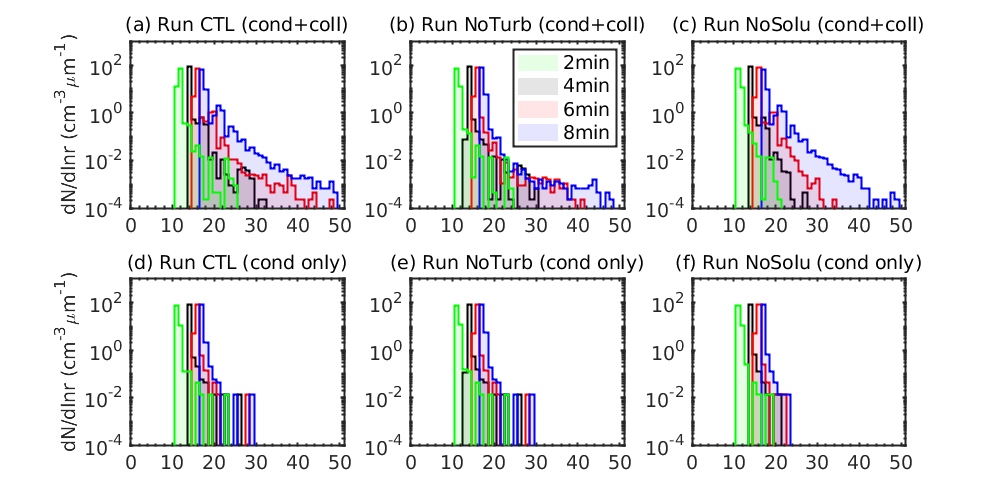

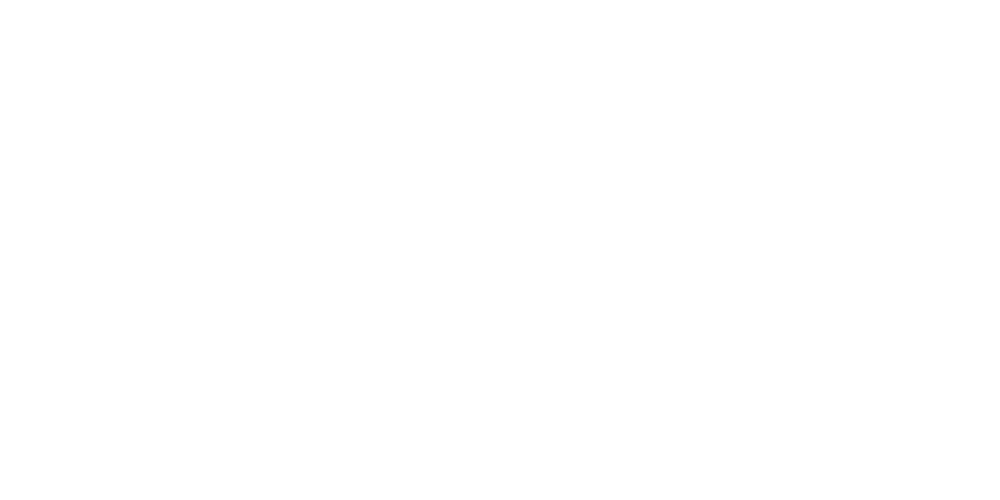

In [5]:
%%DSD stairs
clear all
%plot -b inline -h 500 -w 1000
%dirpath='./New_version(double_precision) data/cond_coll_smalldt/';
dirpath='/glade/u/home/sisichen/seeding_cases_link/cc_largedt/';
dirpath1='/glade/u/home/sisichen/seeding_cases_link/condensation_only/';
fontsize_set=14;
i_dsd_evo = 0; %plot DSD evolution
i_dsd_stairs = 1; %plot stairs gram of certain time frame.
i_mass = 0; %plot mass distribution
%iplot_stairs = 0;
i_dsd_samecase = 0; %output the same case dsd of different times
ipart2=0;
idisp=0;
i_6min=0; %%%plot DSD at 6min
Time=500; %second
dsd_limit = 50; %maximum bin size plotted out
scenario={'5micron','gravity','no_solute','5micron_seed','double_seeding','GCCN'};
label_tag={'(a) Run CTL (cond+coll)','(b) Run NoTurb (cond+coll)','(c) Run NoSolu (cond+coll)',...
        '(d) Run CTL (cond only)','(e) Run NoTurb (cond only)','(f) Run NoSolu (cond only)'};
total_case=[1:3];
selected_case=scenario(total_case);
nmap=length(total_case);
%map = brewermap(nmap,'Set1');
map=colormap(hsv(nmap));
l=16.5;
ncase=length(total_case);
figure1=figure;
set(figure1,'Visible','on');
set(0,'DefaultAxesTitleFontWeight','normal');
nframe=3;
if i_dsd_evo == 1
    figfilename=['dsd_evo' ];
elseif i_dsd_stairs == 1
    figfilename=[ 'dsd_stairs' ];
end 
for i_case=1:ncase
    CASE=scenario{total_case(i_case)};
    filename=[dirpath, CASE, '/RUN06262018.dsd'];
    filename_mean=[dirpath, CASE, '/RUN06262018.nc'];
    
    scenario{total_case(i_case)};
    clear DSD DSD2 avg max0 disp max95 DSD_TIME lwc dbz
    if i_dsd_samecase==1
        switch nframe
        case 1
            Time=120;
            leg{1}='2min';
        case 2
            Time=240;
            leg{2}='4min';
        case 3
            Time=360;
            leg{3}='6min';
        case 4 
            Time=420;
            leg{4}='7min';
        end
    end
    if i_case == 1
        iplot_starts=1;
    else
        iplot_starts=0;
    end
    DSD=load(filename);
    DSD(:,51:end)=0;
    meandata=load(filename_mean);
    [sizet,sizev]=size(meandata) ;
    [m,n]=size(DSD); %m=time n=binsxx
    %%dispersion parameter
    radii=1:100;
    max0=0;
    max95=0;
    DSD1=DSD(:,2:end);
    for t=1:m
        DSD2=DSD(t,2:end);
        DSD_TIME=DSD(:,1)-DSD(1,1);
        for drop_size=1:100
            DSD_cum(t,drop_size)=sum(DSD2(1:drop_size));
        end
    end %t
    if i_dsd_stairs ==1
        DSD2=0;
        A=find(DSD==0);
        DSD2=DSD;
        DSD2(A)=1d-5;
        if i_mass==1
            DSD2(A)=NaN;
        end
        DSD2=DSD2/l^3;
        subplot(2,3,i_case,'Visible','on');
        axes1=findobj(gcf,'type','axes');
        %axes1 = axes('Parent',figure1,'YScale','log');
        
        if i_mass==1
            Nlog=[.5:99.5].^3*4/3*pi*1e6*1e-12; %m^-3
        else
            Nlog=1;%[.5:98.5];
        end
        DSD_stairs=DSD2(1,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %T=0min
        %b=stairs(.5:99.5,DSD_stairs,'Color','k','LineStyle','--','LineWidth',1);
        %hold on
        %h= bar(1:100,DSD_stairs,'FaceColor','k',...
        %    'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
        %end
        
        Tindex=find(DSD_TIME>=(240+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h2(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','k','LineWidth',1);
        hold on
        h= bar(1:100,DSD_stairs,'FaceColor','k',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
  
  
        Tindex=find(DSD_TIME>=(360+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h2(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b2= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','r','LineWidth',1);
        h2= bar(1:100,DSD_stairs,'FaceColor','r',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
  
        
        Tindex=find(DSD_TIME>=(480+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h2(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b3= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','b','LineWidth',1);
        h3= bar(1:100,DSD_stairs,'FaceColor','b',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
            
        Tindex=find(DSD_TIME>=(120+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h1(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b1= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','g','LineWidth',1);
        h1= bar(1:100,DSD_stairs,'FaceColor','g',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
          
        title(label_tag(total_case(i_case)))
        if i_mass==1
            ylim([5e-5 5])
            xlim([0 dsd_limit+1])
        else
            ylim([1e-4 1e3])
            xlim([0 dsd_limit+1])
        end
        set(gca,'YScale','log');
        if i_case == 2
            if i_dsd_samecase==1
                legend([h h2],'init',leg{1:length(total_case)})
            else
                %legend([h h2 h3],'0min','6min','8min')
                legend([h1 h h2 h3],'2min','4min','6min','8min')%,label_tag{total_case})
            end
        end
        if (i_case == 1) || (i_case == 4)
            if i_mass==1
                ylabel('dg/dlnr (gm^{-3}\mum^{-1})')
            else
                ylabel('dN/dlnr (cm^{-3}\mum^{-1})')
            end
        end
        if (i_case >= 4)
            xlabel('Radius (\mum)')
        end
        set(axes1(1),'YMinorTick','on','XMinorTick','on','XTick',...
            [0 10 20 30 40 50 60],'YTick',[1e-4 1e-2 1 1e2])
    end
    if idisp==1
        %dispersion parameter
        plot(DSD_TIME,disp)
        hold on
        %xlim([0 Time/60+0.1])
        ylabel('dispersion parameter')
        xlabel('Time(min)')
    end
     %% plot DSD evolution
    if i_dsd_evo == 1
        cm= [1 1 1;0.954010725021362 0.925846695899963 0.959714770317078;0.90802139043808 0.851693391799927 0.9194296002388;0.862032055854797 0.77754008769989 0.879144370555878;0.81604278087616 0.703386783599854 0.8388592004776;0.770053505897522 0.629233539104462 0.798573970794678;0.72406417131424 0.555080235004425 0.7582888007164;0.678074836730957 0.480926930904388 0.718003571033478;0.632085561752319 0.406773626804352 0.6777184009552;0.586096286773682 0.332620322704315 0.637433171272278;0.540106952190399 0.258467018604279 0.597148001194;0.494117647409439 0.184313729405403 0.556862771511078;0.479336351156235 0.227450981736183 0.58582204580307;0.46455505490303 0.270588248968124 0.614781320095062;0.449773758649826 0.313725501298904 0.643740594387054;0.434992462396622 0.356862753629684 0.672699868679047;0.420211166143417 0.400000005960464 0.701659142971039;0.405429869890213 0.443137258291245 0.730618417263031;0.390648573637009 0.486274510622025 0.759577691555023;0.375867277383804 0.529411792755127 0.788536965847015;0.3610859811306 0.572549045085907 0.817496240139008;0.346304684877396 0.615686297416687 0.846455514431;0.331523388624191 0.658823549747467 0.875414788722992;0.316742092370987 0.701960802078247 0.904374063014984;0.301960796117783 0.745098054409027 0.933333337306976;0.329055279493332 0.768270969390869 0.903030335903168;0.356149733066559 0.791443884372711 0.872727274894714;0.383244216442108 0.814616739749908 0.842424273490906;0.410338699817657 0.83778965473175 0.812121212482452;0.437433183193207 0.860962569713593 0.781818211078644;0.464527636766434 0.884135484695435 0.75151515007019;0.491622120141983 0.907308399677277 0.721212148666382;0.51871657371521 0.930481314659119 0.690909087657928;0.545811057090759 0.953654170036316 0.66060608625412;0.572905540466309 0.976827085018158 0.630303025245667;0.600000023841858 1 0.600000023841858;0.6307692527771 1 0.553846180438995;0.661538481712341 1 0.507692337036133;0.692307710647583 1 0.46153849363327;0.723076939582825 1 0.415384620428085;0.753846168518066 1 0.369230777025223;0.784615397453308 1 0.32307693362236;0.81538462638855 1 0.276923090219498;0.846153855323792 1 0.230769246816635;0.876923084259033 1 0.184615388512611;0.907692313194275 1 0.138461545109749;0.938461542129517 1 0.0923076942563057;0.969230771064758 1 0.0461538471281528;1 1 0;1 0.933333337306976 0;1 0.866666674613953 0;1 0.800000011920929 0;1 0.733333349227905 0;1 0.666666686534882 0;1 0.600000023841858 0;1 0.533333361148834 0;1 0.466666668653488 0;1 0.400000005960464 0;1 0.333333343267441 0;1 0.266666680574417 0;1 0.200000002980232 0;1 0.133333340287209 0;1 0.0666666701436043 0;1 0 0];
        subplot(2,3,i_case,'Visible','on');
        colormap(cm)
        V=l^3;
        DSD_plot=DSD1;
        %DSD_plot(1,:)=DSD(1,2:end)/80*15;
        B=find(DSD_plot==0);
        DSD_plot(B)=1e-5;
        DSD_plot1=DSD_plot/V;
        if (DSD_TIME(end)-DSD_TIME(1))>Time
            B=find(DSD_TIME-DSD_TIME(1)<=Time);
            time_limit=B(end);
        else
            time_limit=length(DSD_TIME);
        end
            
        DSD_plot1=log10(DSD_plot1(1:time_limit,1:dsd_limit));
        [x,y]=meshgrid(1:dsd_limit,(DSD_TIME(1:time_limit)-DSD_TIME(1))/60);
        %axes1=subplot(2,2,4);
        %colormap(cm);
        if ncase==1
            axes1 = axes('parent',figure1);
        else
            axes1=findobj(gcf,'type','axes');
        end
        hold(axes1(1),'on');
        % ylim(axes1,[1 3204]);
        box(axes1(1),'on');
        % Set the remaining axes properties
        set(axes1(1),'CLim',[-3 1.3412],'YMinorTick','on','YTick',...
            [0 2 4 6 8],'XMinorTick','on','XTick',[0 10 20 30 40 50])

        % Create xlabel
        if (i_case >=4)
            xlabel('Radius (\mum) ');
        end
        % Create ylabel
        if (i_case ==1 )|| (i_case == 4) 
            ylabel('Time (min)');
        end
        pcolor(x,y,DSD_plot1);
        % Create colorbar
        if (i_case == length(total_case))
            colorbar('peer',axes1(1),'Position',...
            [0.928362573099415 0.472511144130758 0.0146198830409356 0.341753343239227],...
            'Ticks',[-3 -2 -1 0 1 2],...
                    'TickLabels',{'0.001','.01','.1','1','10','100'});
        annotation('textbox',...
            [0.916935672514619 0.423911199766601 0.071368421052632 0.0460624071322436],...
            'String','dN/dlnr (cm^{-3})',...
            'LineStyle','none',...
            'FitBoxToText','off');
        end
        shading flat %interp
        xlim([0 dsd_limit+1])
        ylim([-.1 Time/60+.1])

        %load max0_Grav.mat
        hold on
        CASE=scenario{i_case};
        title(label_tag(total_case(i_case)))
        %%plot(max0+1,DSD_TIME-DSD_TIME(1),'k-')
    end

 end %ncase

%%%%%%%%%%
%%%%%%%%%%
%for condensation
for i_case=1:ncase
    CASE=scenario{total_case(i_case)};
    filename=[dirpath1, CASE, '/RUN06262018.dsd'];
    filename_mean=[dirpath1, CASE, '/RUN06262018.nc'];
    
    scenario{total_case(i_case)};
    clear DSD DSD2 avg max0 disp max95 DSD_TIME lwc dbz
    if i_dsd_samecase==1
        switch nframe
        case 1
            Time=120;
            leg{1}='2min';
        case 2
            Time=240;
            leg{2}='4min';
        case 3
            Time=360;
            leg{3}='6min';
        case 4 
            Time=420;
            leg{4}='7min';
        end
    end
    if i_case == 1
        iplot_starts=1;
    else
        iplot_starts=0;
    end
    DSD=load(filename);
    DSD(:,51:end)=0;
    meandata=load(filename_mean);
    [sizet,sizev]=size(meandata) ;
    [m,n]=size(DSD); %m=time n=binsxx
    %%dispersion parameter
    radii=1:100;
    max0=0;
    max95=0;
    DSD1=DSD(:,2:end);
    for t=1:m
        DSD2=DSD(t,2:end);
        DSD_TIME=DSD(:,1)-DSD(1,1);
        for drop_size=1:100
            DSD_cum(t,drop_size)=sum(DSD2(1:drop_size));
        end
    end %t
    if i_dsd_stairs ==1
        DSD2=0;
        A=find(DSD==0);
        DSD2=DSD;
        DSD2(A)=1d-5;
        if i_mass==1
            DSD2(A)=NaN;
        end
        DSD2=DSD2/l^3;
        subplot(2,3,i_case+3,'Visible','on');
        axes1=findobj(gcf,'type','axes');
        %axes1 = axes('Parent',figure1,'YScale','log');
        
        if i_mass==1
            Nlog=[.5:99.5].^3*4/3*pi*1e6*1e-12; %m^-3
        else
            Nlog=1;%[.5:98.5];
        end
        DSD_stairs=DSD2(1,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %T=0min
        %b=stairs(.5:99.5,DSD_stairs,'Color','k','LineStyle','--','LineWidth',1);
        %hold on
        %h= bar(1:100,DSD_stairs,'FaceColor','k',...
        %    'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
        %end
        
        Tindex=find(DSD_TIME>=(240+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h2(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','k','LineWidth',1);
        hold on
        h= bar(1:100,DSD_stairs,'FaceColor','k',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
  
  
        Tindex=find(DSD_TIME>=(360+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h2(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b2= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','r','LineWidth',1);
        h2= bar(1:100,DSD_stairs,'FaceColor','r',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
  
        
        Tindex=find(DSD_TIME>=(480+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h2(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b3= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','b','LineWidth',1);
        h3= bar(1:100,DSD_stairs,'FaceColor','b',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
            
        Tindex=find(DSD_TIME>=(120+DSD_TIME(1)));
        if ~isempty(Tindex)
            END=Tindex(1);
        else
            ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
            END=length(DSD_TIME);
        end
        B=find(DSD2<0.0001);
        DSD2(B)=NaN;
        DSD_stairs=DSD2(END,2:end).*Nlog;
        A=isnan(DSD_stairs);
        DSD_stairs(A)=1e-7;
        %h1(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
        b1= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','g','LineWidth',1);
        h1= bar(1:100,DSD_stairs,'FaceColor','g',...
            'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
          
        title(label_tag{i_case+3})
        if i_mass==1
            ylim([5e-5 5])
            xlim([0 dsd_limit+1])
        else
            ylim([1e-4 1e3])
            xlim([0 dsd_limit+1])
        end
        set(gca,'YScale','log');
        if (i_case == 1) || (i_case == 4)
            if i_mass==1
                ylabel('dg/dlnr (gm^{-3}\mum^{-1})')
            else
                ylabel('dN/dlnr (cm^{-3}\mum^{-1})')
            end
        end
        if (i_case >= 4)
            xlabel('Radius (\mum)')
        end
        set(axes1(1),'YMinorTick','on','XMinorTick','on','XTick',...
            [0 10 20 30 40 50 60],'YTick',[1e-4 1e-2 1 1e2])
    end
    if idisp==1
        %dispersion parameter
        plot(DSD_TIME,disp)
        hold on
        %xlim([0 Time/60+0.1])
        ylabel('dispersion parameter')
        xlabel('Time(min)')
    end
     %% plot DSD evolution
    if i_dsd_evo == 1
        cm= [1 1 1;0.954010725021362 0.925846695899963 0.959714770317078;0.90802139043808 0.851693391799927 0.9194296002388;0.862032055854797 0.77754008769989 0.879144370555878;0.81604278087616 0.703386783599854 0.8388592004776;0.770053505897522 0.629233539104462 0.798573970794678;0.72406417131424 0.555080235004425 0.7582888007164;0.678074836730957 0.480926930904388 0.718003571033478;0.632085561752319 0.406773626804352 0.6777184009552;0.586096286773682 0.332620322704315 0.637433171272278;0.540106952190399 0.258467018604279 0.597148001194;0.494117647409439 0.184313729405403 0.556862771511078;0.479336351156235 0.227450981736183 0.58582204580307;0.46455505490303 0.270588248968124 0.614781320095062;0.449773758649826 0.313725501298904 0.643740594387054;0.434992462396622 0.356862753629684 0.672699868679047;0.420211166143417 0.400000005960464 0.701659142971039;0.405429869890213 0.443137258291245 0.730618417263031;0.390648573637009 0.486274510622025 0.759577691555023;0.375867277383804 0.529411792755127 0.788536965847015;0.3610859811306 0.572549045085907 0.817496240139008;0.346304684877396 0.615686297416687 0.846455514431;0.331523388624191 0.658823549747467 0.875414788722992;0.316742092370987 0.701960802078247 0.904374063014984;0.301960796117783 0.745098054409027 0.933333337306976;0.329055279493332 0.768270969390869 0.903030335903168;0.356149733066559 0.791443884372711 0.872727274894714;0.383244216442108 0.814616739749908 0.842424273490906;0.410338699817657 0.83778965473175 0.812121212482452;0.437433183193207 0.860962569713593 0.781818211078644;0.464527636766434 0.884135484695435 0.75151515007019;0.491622120141983 0.907308399677277 0.721212148666382;0.51871657371521 0.930481314659119 0.690909087657928;0.545811057090759 0.953654170036316 0.66060608625412;0.572905540466309 0.976827085018158 0.630303025245667;0.600000023841858 1 0.600000023841858;0.6307692527771 1 0.553846180438995;0.661538481712341 1 0.507692337036133;0.692307710647583 1 0.46153849363327;0.723076939582825 1 0.415384620428085;0.753846168518066 1 0.369230777025223;0.784615397453308 1 0.32307693362236;0.81538462638855 1 0.276923090219498;0.846153855323792 1 0.230769246816635;0.876923084259033 1 0.184615388512611;0.907692313194275 1 0.138461545109749;0.938461542129517 1 0.0923076942563057;0.969230771064758 1 0.0461538471281528;1 1 0;1 0.933333337306976 0;1 0.866666674613953 0;1 0.800000011920929 0;1 0.733333349227905 0;1 0.666666686534882 0;1 0.600000023841858 0;1 0.533333361148834 0;1 0.466666668653488 0;1 0.400000005960464 0;1 0.333333343267441 0;1 0.266666680574417 0;1 0.200000002980232 0;1 0.133333340287209 0;1 0.0666666701436043 0;1 0 0];
        subplot(2,3,i_case+3,'Visible','on');
        colormap(cm)
        V=l^3;
        DSD_plot=DSD1;
        %DSD_plot(1,:)=DSD(1,2:end)/80*15;
        B=find(DSD_plot==0);
        DSD_plot(B)=1e-5;
        DSD_plot1=DSD_plot/V;
        if (DSD_TIME(end)-DSD_TIME(1))>Time
            B=find(DSD_TIME-DSD_TIME(1)<=Time);
            time_limit=B(end);
        else
            time_limit=length(DSD_TIME);
        end
            
        DSD_plot1=log10(DSD_plot1(1:time_limit,1:dsd_limit));
        [x,y]=meshgrid(1:dsd_limit,(DSD_TIME(1:time_limit)-DSD_TIME(1))/60);
        %axes1=subplot(2,2,4);
        %colormap(cm);
        if ncase==1
            axes1 = axes('parent',figure1);
        else
            axes1=findobj(gcf,'type','axes');
        end
        hold(axes1(1),'on');
        % ylim(axes1,[1 3204]);
        box(axes1(1),'on');
        % Set the remaining axes properties
        set(axes1(1),'CLim',[-3 1.3412],'YMinorTick','on','YTick',...
            [0 2 4 6 8],'XMinorTick','on','XTick',[0 10 20 30 40 50])

        % Create xlabel
        if (i_case >=4)
            xlabel('Radius (\mum) ');
        end
        % Create ylabel
        if (i_case ==1 )|| (i_case == 4) 
            ylabel('Time (min)');
        end
        pcolor(x,y,DSD_plot1);
        % Create colorbar
        if (i_case == length(total_case))
            colorbar('peer',axes1(1),'Position',...
            [0.928362573099415 0.472511144130758 0.0146198830409356 0.341753343239227],...
            'Ticks',[-3 -2 -1 0 1 2],...
                    'TickLabels',{'0.001','.01','.1','1','10','100'});
        annotation('textbox',...
            [0.916935672514619 0.423911199766601 0.071368421052632 0.0460624071322436],...
            'String','dN/dlnr (cm^{-3})',...
            'LineStyle','none',...
            'FitBoxToText','off');
        end
        shading flat %interp
        xlim([0 dsd_limit+1])
        ylim([-.1 Time/60+.1])

        %load max0_Grav.mat
        hold on
        CASE=scenario{i_case};
        title(label_tag{i_case+3})
        %%plot(max0+1,DSD_TIME-DSD_TIME(1),'k-')
    end

 end %ncase
 
%%%%%%%%%%
%%%%%%%%%%
 
%print('-djpeg','-r300',['~/' figfilename ])

set(findall(gcf,'-property','FontSize'),'FontSize',fontsize_set)
set(findall(gcf,'-property','LineWidth'),'LineWidth',1.5)
%print( '-append', '-dpsc2', figfilename);
print(figure1,'-depsc', 'stairs')
savefig('stairs.fig')
saveas(figure1,'Fig_dsd','pdf')


m =

        6765




selected_case =

  1x6 cell array

  Columns 1 through 4

    {'5micron'}    {'gravity'}    {'no_solute'}    {'5micron_seed'}

  Columns 5 through 6

    {'double_seeding'}    {'GCCN'}



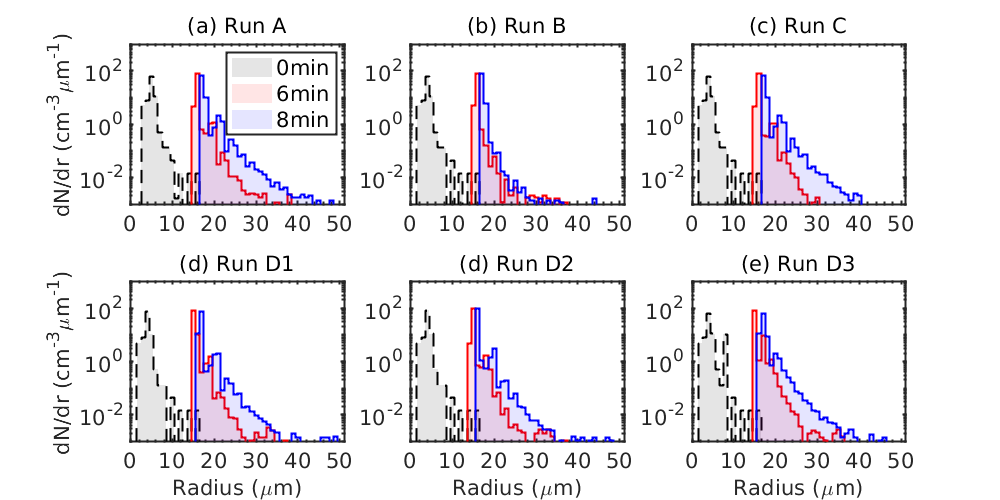

In [5]:
clear all
%plot -b inline -h 700 -w 1000
%dirpath='./New_version(double_precision) data/cond_coll_smalldt/';
dirpath='/glade/u/home/sisichen/seeding_cases_link/cc_largedt/';
%dirpath='/glade/u/home/sisichen/seeding_cases_link/condensation_only/';
scenario={'5micron','gravity','no_solute','5micron_seed','double_seeding','GCCN'};
label_tag={'(a) Run A','(b) Run B','(c) Run C','(d) Run D1','(d) Run D2','(e) Run D3'};
label_onplot={'Run A','Run B','Run C','Run D1','Run D2','Run D3'};
total_case=[1:2];
selected_case=scenario(total_case)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
fontsize_set=16;
i_dsd_evo = 0; %plot DSD evolution
i_dsd_stairs = 1; %plot stairs gram of certain time frame.
i_dsd_stairs_PutInOneFig = 1;
i_mass = 1; %plot mass distribution
%iplot_stairs = 0;
i_dsd_samecase = 0; %output the same case dsd of different times
i_statistics=0;
ipart2=0;
idisp=0;
i_6min=0; %%%plot DSD at 6min
Time=500; %second
dsd_limit = 50; %maximum bin size plotted out
%% colormap
imap = 1;

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
nmap=length(total_case);
if imap==1 %gist_ncar colormap
    map=[0.        , 0.        , 0.502;
       0.        , 0.77522593, 1.;
       0.14987018, 0.94079948, 0.;
       0.85737517, 1.        , 0.12482388;
       1.        , 0.44038591, 0.02197245;
       0.70312941, 0.14841648, 1.;
       0.9961    , 0.9725    , 0.9961];
elseif imap==2
    map=colormap(hsv(nmap));
    %map = brewermap(nmap,'Set1');
elseif imap==3 %gist_rainbow
    map=[1., 0., 0.16; 1., 0.91891892, 0; 0., 1., 0; 0., 0.92391304, 1.; 0.16304348, 0., 1.; 1., 0., 0.75];
elseif imap==4
    cm=colormap(jet(5));
    set(groot, 'DefaultAxesColorOrder',cm,'defaultAxesLineStyleOrder','-|--|--<|:o|-.diamond|--square|-x')

end

l=16.5;
ncase=length(total_case);

figure1=figure;
if i_dsd_stairs_PutInOneFig == 1
    axes1 = axes('Parent',figure1,'YScale','log');
end
set(0,'DefaultAxesTitleFontWeight','normal');
nframe=3;

if i_dsd_evo == 1
    figfilename=['./dsd_evo.png' ];
elseif i_dsd_stairs == 1
    figfilename=[ './dsd_stairs.png' ];
end 
for i_case=1:ncase

    CASE=scenario{total_case(i_case)};
    filename=[dirpath, CASE, '/RUN06262018.dsd'];
    filename_mean=[dirpath, CASE, '/RUN06262018.nc'];
    scenario{total_case(i_case)};
    clear DSD DSD2 avg max0 disp max95 DSD_TIME lwc dbz
    if i_dsd_samecase==1
        switch nframe
        case 1
            Time=120;
            leg{1}='2min';
        case 2
            Time=240;
            leg{2}='4min';
        case 3
            Time=360;
            leg{3}='6min';
        case 4 
            Time=420;
            leg{4}='7min';
        end
    end
    if i_case == 1
        iplot_starts=1;
    else
        iplot_starts=0;
    end
    DSD=load(filename);
    DSD(:,51:end)=0;
    meandata=load(filename_mean);
    supersat=meandata(:,2);
    supersat_time=meandata(:,1)-meandata(1,1);
    [m,n]=size(DSD); %m=time n=binsxx
    %%dispersion parameter
    radii=1:100;
    max0=0;
    max95=0;
    DSD1=DSD(:,2:end);
    for t=1:m
        DSD2=DSD(t,2:end);
        DSD_TIME=DSD(:,1)-DSD(1,1);
        for drop_size=1:100
            DSD_cum(t,drop_size)=sum(DSD2(1:drop_size));
        end
        %mean
        avg(t)=(sum(DSD2.*radii.^3)/sum(DSD2))^(1/3);
        %standard deviation
        SD(t)=sqrt(sum(DSD2.*((radii-avg(t)).^2))/sum(DSD2));
        %dispersion parameter=SD/avg
        disp(t)=SD(t)/avg(t);
        %maximum radius
        max0(t)=max(find(DSD(t,:)>0));
        %largest droplet of 95% percentile 
        max95(t)=max(find(DSD_cum(t,:)./DSD_cum(t,end)<=0.999));
        %LWC
        lwc(t)=sum(4/3*pi*((1:100)*1e-6).^3.*DSD2*1e6)/(l/100)^3;
        %radar reflectivity
        reflect(t)=sum(DSD2.*((1:100)*2*1e-3).^6/(l/100)^3);
        dbz(t)=10*log10(reflect(t));
    end %t
    %% get statistics at 6min and plot DSD
    if i_6min==1
    A=find(DSD_TIME>360 & DSD_TIME<362);
    AVG(i_case)=avg(A(end));
    DISP(i_case)=disp(A(end));
    MAX(i_case)=max0(A(end));
    LWC(i_case)=lwc(A(end));
    DBZ(i_case)=dbz(A(end));
    SDD(i_case)=SD(A(end));
    figure;
    bar(1:100,DSD(A(end),2:end),1)
    set(gca,'YScale','log')
    xlim([0 dsd_limit+1])
    title(label_tag(total_case(i_case)))
    end
%%

    if i_statistics == 1
        if iplot_starts==1
            figure1=figure; set(figure1,'Visible','on');
        end
        subplot(2,2,1)
        h_avg(i_case)=plot(DSD_TIME/60, avg,'LineStyle','-','Color',map(i_case,:));
        ylabel('Mean radius (\mum)')
        xlabel('Time (min)')
        hold on
        xlim([0 Time/60+0.1])
        title('(a)')
        subplot(2,2,2)
        h_disp(i_case)=plot(DSD_TIME/60, disp,'LineStyle','-','Color',map(i_case,:));
        ylabel('dispersion parameter')
        xlabel('Time (min)')
        hold on
        xlim([0 Time/60+0.1])
        title('(b)')
        subplot(2,2,3)
        h_max(i_case)=plot(supersat_time/60, supersat,'LineStyle','-','Color',map(i_case,:));
        ylabel('Supersaturation')
        xlabel('Time (min)')
        hold on
        xlim([0 Time/60+0.1])
        title('(c)')
        subplot(2,2,4)
        h_lwc(i_case)=plot(DSD_TIME/60, lwc,'LineStyle','-','Color',map(i_case,:));
        ylabel('LWC (g/kg)')
        xlabel('Time (min)')
        hold on
        xlim([0 Time/60+0.1])
        title('(d)')
    end

    if i_dsd_stairs ==1
        DSD2=0;
        A=find(DSD==0);
        DSD2=DSD;
        DSD2(A)=1d-5;
        if i_mass==1
            DSD2(A)=NaN;
        end
        DSD2=DSD2/l^3;
        
        if i_mass==1
            Nlog=[.5:99.5].^3*4/3*pi*1e6*1e-12; %m^-3
        else
            Nlog=1;%[.5:98.5];
        end
        

        if i_dsd_stairs_PutInOneFig == 0
            if ncase == 6
                figure1 = subplot(2,3,i_case,'Visible','on');
                axes1=findobj(gcf,'type','axes');
            else
                figure1 = figure;
                axes1 = axes('Parent',figure1,'YScale','log');
            end
            
            DSD_stairs=DSD2(1,2:end).*Nlog;
            A=isnan(DSD_stairs);
            DSD_stairs(A)=1e-5;
            h1=stairs(.5:99.5,DSD_stairs,'Color','k','LineStyle','--','LineWidth',1);
            hold on
            h= bar(1:100,DSD_stairs,'FaceColor','k',...
                'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
                
            Tindex=find(DSD_TIME>=(360+DSD_TIME(1)));
            if ~isempty(Tindex)
                END=Tindex(1);
            else
                ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', 360) 's']
                END=length(DSD_TIME);
            end
            
            B=find(DSD2<0.0001);
            DSD2(B)=NaN;
            DSD_stairs=DSD2(END,2:end).*Nlog;
            A=isnan(DSD_stairs);
            DSD_stairs(A)=1e-7;
            b2(i_case)= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','r','LineWidth',1);
            hold on
            h2(i_case)= bar(1:100,DSD_stairs,'FaceColor','r',...
                'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
                
            Tindex=find(DSD_TIME>=(480+DSD_TIME(1)));
            if ~isempty(Tindex)
                END=Tindex(1);
            else
                ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', 480) 's']
                END=length(DSD_TIME);
            end
            
            B=find(DSD2<0.0001);
            DSD2(B)=NaN;
            DSD_stairs=DSD2(END,2:end).*Nlog;
            A=isnan(DSD_stairs);
            DSD_stairs(A)=1e-7;       
            %h2(i_case)= plot(1:100,DSD_stairs,'LineStyle','-','Color',map(i_case,:),'LineWidth',1);
            b3(i_case)= stairs(.5:99.5,DSD_stairs,'LineStyle','-','Color','b','LineWidth',1);
            hold on
            h3(i_case)= bar(1:100,DSD_stairs,'FaceColor','b',...
                'BarWidth',1.0,'FaceAlpha',0.1,'EdgeColor','none');
            title(label_tag(total_case(i_case))) 
            
        elseif i_dsd_stairs_PutInOneFig == 2
            Tindex=find(DSD_TIME>=(Time+DSD_TIME(1)));
            if ~isempty(Tindex)
                END=Tindex(1);
            else
                ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', 360) 's']
                END=length(DSD_TIME);
            end
            
            B=find(DSD2<0.0001);
            DSD2(B)=NaN;
            
            %number distribution
            DSD_stairs=DSD2(END,2:end)
            A=isnan(DSD_stairs);
            DSD_stairs(A)=1e-7;
            
            figure1=subplot(2,1,1,'Visible','on');
            axes1=findobj(gcf,'type','axes');
            b3(i_case)=plot(.5:99.5,DSD_stairs,'LineStyle','-','Color',map(total_case(i_case),:),'LineWidth',1);
            hold on
            set(gca,'YScale','log');
            xlim([10 dsd_limit+1])
            ylim([1e-3 1e3])
            ylabel('dN/dr (cm^{-3}\mum^{-1})')
            xlabel('Radius (\mum)')
            
            %mass distribution
            Nlog=[.5:99.5].^3*4/3*pi*1e6*1e-12; %m^-3
            DSD_stairs=DSD_stairs.*Nlog;
            DSD_stairs(A)=1e-7;
            
            figure1=subplot(2,1,2,'Visible','on');
            axes0=findobj(gcf,'type','axes');
            h3(i_case) = plot(.5:99.5,DSD_stairs,'LineStyle','-','Color',map(total_case(i_case),:),'LineWidth',1);
            xlim([10 dsd_limit+1])
            ylim([5e-5 5])
            ylabel('dg/dr (gm^{-3}\mum^{-1})')
            xlabel('Radius (\mum)')
            
        elseif i_dsd_stairs_PutInOneFig == 1
            
            Tindex=find(DSD_TIME>=(Time+DSD_TIME(1)));
            if ~isempty(Tindex)
                END=Tindex(1);
            else
                ['Total time = ' DSD_TIME(end),' shorter than ' sprintf('%d', Time) 's']
                END=length(DSD_TIME);
            end
            B=find(DSD2<0.0001);
            DSD2(B)=NaN;
            %number distribution
            DSD_stairs=DSD2(END,2:end).*Nlog;
            A=isnan(DSD_stairs);
            DSD_stairs(A)=1e-7;
            
            b3(i_case)=plot(.5:99.5,DSD_stairs,'LineStyle','-','Color',map(total_case(i_case),:),'LineWidth',1);
            hold on
        end
        

        if i_dsd_stairs_PutInOneFig == 0
            if i_mass==1
                ylim([5e-5 5])
                xlim([10 dsd_limit+1])
            else
                ylim([1e-3 1e3])
                xlim([0 dsd_limit+1])
            end
            set(gca,'YScale','log');
            if i_case == 1
                legend([h h2 h3],'0min','6min','8min')%,label_tag{total_case})
            end
            if (i_case == 1) || (i_case == 4) 
                if i_mass==1
                    ylabel('dg/dr (gm^{-3}\mum^{-1})')
                else
                    ylabel('dN/dr (cm^{-3}\mum^{-1})')
                end
            end
            if (i_case >= 4)
                xlabel('Radius (\mum)')
            end
            set(axes1(1),'YMinorTick','on','XMinorTick','on','XTick',...
                [0 10 20 30 40 50 60],'YTick',[1e-4 1e-2 1 1e2])

        end

    end

    if idisp==1
        %dispersion parameter
        plot(DSD_TIME,disp)
        hold on
        %xlim([0 Time/60+0.1])
        ylabel('dispersion parameter')
        xlabel('Time(min)')
    end
     %% plot DSD evolution
    if i_dsd_evo == 1
        cm= [1 1 1;0.954010725021362 0.925846695899963 0.959714770317078;0.90802139043808 0.851693391799927 0.9194296002388;0.862032055854797 0.77754008769989 0.879144370555878;0.81604278087616 0.703386783599854 0.8388592004776;0.770053505897522 0.629233539104462 0.798573970794678;0.72406417131424 0.555080235004425 0.7582888007164;0.678074836730957 0.480926930904388 0.718003571033478;0.632085561752319 0.406773626804352 0.6777184009552;0.586096286773682 0.332620322704315 0.637433171272278;0.540106952190399 0.258467018604279 0.597148001194;0.494117647409439 0.184313729405403 0.556862771511078;0.479336351156235 0.227450981736183 0.58582204580307;0.46455505490303 0.270588248968124 0.614781320095062;0.449773758649826 0.313725501298904 0.643740594387054;0.434992462396622 0.356862753629684 0.672699868679047;0.420211166143417 0.400000005960464 0.701659142971039;0.405429869890213 0.443137258291245 0.730618417263031;0.390648573637009 0.486274510622025 0.759577691555023;0.375867277383804 0.529411792755127 0.788536965847015;0.3610859811306 0.572549045085907 0.817496240139008;0.346304684877396 0.615686297416687 0.846455514431;0.331523388624191 0.658823549747467 0.875414788722992;0.316742092370987 0.701960802078247 0.904374063014984;0.301960796117783 0.745098054409027 0.933333337306976;0.329055279493332 0.768270969390869 0.903030335903168;0.356149733066559 0.791443884372711 0.872727274894714;0.383244216442108 0.814616739749908 0.842424273490906;0.410338699817657 0.83778965473175 0.812121212482452;0.437433183193207 0.860962569713593 0.781818211078644;0.464527636766434 0.884135484695435 0.75151515007019;0.491622120141983 0.907308399677277 0.721212148666382;0.51871657371521 0.930481314659119 0.690909087657928;0.545811057090759 0.953654170036316 0.66060608625412;0.572905540466309 0.976827085018158 0.630303025245667;0.600000023841858 1 0.600000023841858;0.6307692527771 1 0.553846180438995;0.661538481712341 1 0.507692337036133;0.692307710647583 1 0.46153849363327;0.723076939582825 1 0.415384620428085;0.753846168518066 1 0.369230777025223;0.784615397453308 1 0.32307693362236;0.81538462638855 1 0.276923090219498;0.846153855323792 1 0.230769246816635;0.876923084259033 1 0.184615388512611;0.907692313194275 1 0.138461545109749;0.938461542129517 1 0.0923076942563057;0.969230771064758 1 0.0461538471281528;1 1 0;1 0.933333337306976 0;1 0.866666674613953 0;1 0.800000011920929 0;1 0.733333349227905 0;1 0.666666686534882 0;1 0.600000023841858 0;1 0.533333361148834 0;1 0.466666668653488 0;1 0.400000005960464 0;1 0.333333343267441 0;1 0.266666680574417 0;1 0.200000002980232 0;1 0.133333340287209 0;1 0.0666666701436043 0;1 0 0];
        if ncase == 6
            figure1 = subplot(2,3,i_case,'Visible','on');
            colormap(cm)
        else
            figure1=figure('Colormap',cm,'Visible','on');
        end
        V=l^3;
        DSD_plot=DSD1;
        %DSD_plot(1,:)=DSD(1,2:end)/80*15;
        B=find(DSD_plot==0);
        DSD_plot(B)=1e-5;
        DSD_plot1=DSD_plot/V;
        if (DSD_TIME(end)-DSD_TIME(1))>Time
            B=find(DSD_TIME-DSD_TIME(1)<=Time);
            time_limit=B(end);
        else
            time_limit=length(DSD_TIME);
        end
            
        DSD_plot1=log10(DSD_plot1(1:time_limit,1:dsd_limit));
        [x,y]=meshgrid(1:dsd_limit,(DSD_TIME(1:time_limit)-DSD_TIME(1))/60);
        %axes1=subplot(2,2,4);
        %colormap(cm);
        if ncase==1
            axes1 = axes('parent',figure1);
        else
            axes1=findobj(gcf,'type','axes');
        end
        hold(axes1(1),'on');
        % ylim(axes1,[1 3204]);
        box(axes1(1),'on');
        % Set the remaining axes properties
        set(axes1(1),'CLim',[-3 1.3412],'YMinorTick','on','YTick',...
            [0 2 4 6 8],'XMinorTick','on','XTick',[0 10 20 30 40 50])

        % Create xlabel
        if (i_case >=4)
            xlabel('Radius (\mum) ');
        end
        % Create ylabel
        if (i_case ==1 )|| (i_case == 4) 
            ylabel('Time (min)');
        end
        pcolor(x,y,DSD_plot1);
        % Create colorbar
        if (i_case == length(total_case))
            colorbar('peer',axes1(1),'Position',...
            [0.928362573099415 0.472511144130758 0.0146198830409356 0.341753343239227],...
            'Ticks',[-3 -2 -1 0 1 2],...
                    'TickLabels',{'0.001','.01','.1','1','10','100'});
        annotation('textbox',...
            [0.916935672514619 0.423911199766601 0.071368421052632 0.0460624071322436],...
            'String','N (cm^{-3})',...
            'LineStyle','none',...
            'FitBoxToText','off');
        end
        shading flat %interp
        xlim([0 dsd_limit+1])
        ylim([-.1 Time/60+.1])

        %load max0_Grav.mat
        hold on
        CASE=scenario{i_case};
        title(label_tag(total_case(i_case)))
        %%plot(max0+1,DSD_TIME-DSD_TIME(1),'k-')
    end

 end %ncase
 

if (i_dsd_stairs_PutInOneFig == 1)
    legend(b3,label_onplot{total_case})
    set(gca,'YScale','log');
    set(axes1,'YMinorTick','on','XMinorTick','on','XTick',...
        [0 10 20 30 40 50 60],'YTick',[1e-4 1e-2 1 1e2])

    xlim([10 dsd_limit+1])
    if i_mass==1
        ylabel('dg/dr (gm^{-3}\mum^{-1})')
        ylim([1e-4 5])
    else
        ylabel('dN/dr (cm^{-3}\mum^{-1})')
        ylim([1e-3 1e3])
    end
    xlabel('Radius (\mum) ')
    
elseif i_dsd_stairs_PutInOneFig == 2
    set(axes0(1),'YMinorTick','on','XMinorTick','on','XTick',...
        [0 10 20 30 40 50 60],'YTick',[1e-4 1e-2 1 1e2])
    set(axes1(1),'YMinorTick','on','XMinorTick','on','XTick',...
        [0 10 20 30 40 50 60],'YTick',[1e-4 1e-2 1 1e2])
end
if i_statistics==1
    legend(h_avg,label_tag(total_case))
end
%%
%print('-djpeg','-r300',['~/' figfilename ])

%% mass distribution
if (ipart2==1)
    V=(l/100)^3;
    r=[1:100]*1e-6;
    DSD_plot(1,:)=DSD(1,2:end)/80*15;
    for i = 1:m
        DSD_plot(i,:)=4/3*pi*DSD(i,2:end)/V.*r.^3*1d6;
    end
    DSD_plot(m,:)=DSD_plot(end,:);
    pcolor(DSD_plot);
    shading flat %interp
    colorbar
%%
    NewDSD=zeros(m,n);
    for i=1:m
        Index=find(DSD(i,2:end)~=0);
        DSD(i,2:length(Index)+1)=DSD(i,Index+1);
        NewDSD(i,2:length(Index)+1)=Index;
    end

end
set(findall(gcf,'-property','FontSize'),'FontSize',fontsize_set)
set(findall(gcf,'-property','LineWidth'),'LineWidth',1.5)
%print(figfilename,'-depsc','-r300','-tiff')